In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, HTML
import matplotlib as mpl
import ipywidgets as widgets
from ipywidgets import interact
%matplotlib notebook
%matplotlib notebook


'''Above, we are importing all the necessary modules in order to run the notebook. 
Numpy allows us to define arrays of values for our variables to plot them
matplotlib is what we use to create the figures
the display and widgets are to make the notebook look neat
'''

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')





# Polynomials 
_____

For a warm-up, we have created an exercise for you to determine the intervals on which a polynomial is $\geq$ 0. A first approach to this problem would be to find the roots of the polynomial and then analyze the behaviour in between these roots. We recommend converting the function into a form that you can graph in order to determine the behaviour on either side of the roots. Think about the possible forms of the graph, i.e. concavity, convexity, and what this tells you about the intervals where the function is positive. This type of analytical thinking will help further along in the notebook. </br>


Given a polynomial of order $\leq$ 3, find where the function $\geq$ 0. 
Below is simply **a** method of approaching this problem, not necessarily the best or most effective. There are many ways one can go about this, each offering a different insight or understanding. Find what works best for you and try to understand why  you used this method (is it visual? is it solely algebraic? did you manipulate the function?).</br>

**Example**:

Find the interval on which $f(x) = x^2 - 3x +2 > 0$.</br>

Solve for roots:</br>

$f(x) = (x-1)(x-2)$</br>

Pick a point in between each root then evaluate the function at this point in order to analyze the behvaiour in between:</br>

$f(0.5) = (0.5)^2 - 3(0.5) + 2 = \frac{1}{4} - \frac{6}{4} + \frac{8}{4} = \frac{3}{4}$ </br>

Therefore the function is positive inbetween the roots.</br>

Answer: (1,2)</br>

By picking a point in between the roots we quickly found whether the function was concave up or down. Knowing what the graph of a parabola looks like, this quickly told us where the function was positive. 

Given a polynomial of order 2 or 3, find where the function $>$ 0. Try polynomials of order 2 first and then 3 for more of a challenge. Input answer in interval notation, using "U" for the union of intervals, for infinity type inf.  

In [2]:
def find_interval():
    display(Latex('Provide order of polynomial:'))
    poly_order = int(input())
    check_interval = 0
    button_clicked = 0
    
    if (poly_order) > 3:
        display(Latex('Order of polynomial must be less than or equal to 3'))
    if poly_order == 3:    
        C = np.random.randint(-5,5,poly_order)
        C1 = -1*np.sum(C)
        C2 = C[0]*C[1] + C[2]*(C[0]+C[1])
        C3 = -1*C[0]*C[1]*C[2]
        display(Latex('Find where the polynomial is $\geq 0 $:'))
        a = 'x^3 + ' + str(int(C1)) + 'x^2 + ' + str(int(C2)) + 'x + ' + str(int(C3))
        display(Math(a))
        def poly(x):
            return x**3 + C1*x**2 + C2*x + C3
        
    if poly_order == 2:
        C = np.random.randint(-5,5,poly_order)
        C1 = -1*np.sum(C)
        C2 = C[0]*C[1]
        display(Latex('Find where the polynomial is $\geq 0 $:'))
        a = 'x^2 +' + str(int(-1.*(C[0] + C[1]))) + 'x +' + str(int(C[0]*C[1]))
        display(Math(a))
        def poly(x):
            return x**2 + C1*x + C2
    
    Max = max(C)
    Min = min(C)
    M = [Min, Max]
    V = np.sort(C)
    eps = 0.01
    
    if poly_order ==3:
        v = V[1]
        if Max == Min and poly(Max +eps) > 0:
                          interval = '('+str(Max)+',inf)'
        if Max == Min and poly(Max +eps) < 0:
                          interval = '(-inf,' + str( Max)+')'
                      
        if poly(Max + eps) >0:
#         interval = '(' + str(Max) + ', infinity)'
            if v !=  Max and v!= Min:
                      interval = '('+str(Min) + ',' + str(v) + ')U(' + str(Max) + ',inf)'
            if v == Max:
                          interval = '(' + str(Min) + ', inf)'
            if v== Min:
                          interval = '(' + str(Max) + ', inf)'
    
        if poly(Max + eps) <0:
 #         interval = '(-infinty,' + str(Min) + ')'
            if v != Max and v != Min:
                          interval = '(-inf,' + str(Min) + 'U('+str(v) + ','+str(Max) + ')'
            if v == Max:
                          interval = '(-inf,' + str( Max) + ')'
            if v == Min:
                          interval = '(-inf,' + str(Min) + ')'
                    
    if poly_order == 2:
            if Max == Min and poly(Max+eps)>0:
                interval = '(' + str(Max) + ', inf)'
            else:
                interval = str(Max)
            if poly(Max + eps)>0:
                interval = '(-inf,'+str(Min)+')U(' + str(Max)+',inf)'
            if poly(Max+eps)<0:
                interval = '('+str(Min)+','+str(Max)+')'
                

    #print(interval)
    
    while  check_interval == 0:
        display(Latex('Input answer in interval notation :'))
        interval_input = str(input())
        if interval_input == interval:
            check_interval = 1
            display(Latex("Correct! Here's a visualization of the solution:"))
            x=np.linspace(-100,100,10000)
            y= poly(x)
            y0 = 0*x
            plt.plot(x,y)
            plt.xlabel(r'$x$', fontsize = 10)
            plt.ylabel(r'$f(x)$', fontsize = 10)
            plt.grid(True, which='major')
            plt.xlim([-9.5,9.5])
            plt.ylim([-10,10])
            display(Latex('Above is a graph of the polynomial:'))
            display(Math(a))
            display(Latex('You can pan around the graph by clicking the fourth button (looks like a cross) and dragging the mouse around. You can zoom in to get a better look at the zeroes by clicking the white square button, and making a rectangle on the plot where you want a closer look. To reset the graph back to normal, press the "home" button.'))
        else:
            display(Latex("That's not quite right, try again." ))
            continue
        
    display(Latex('After inspecting the graph, click the  button to continue to the next part.'))

    button = widgets.Button(description="Next")
    display(button)

    def on_button_clicked(b):
            display(Latex('Great, now lets do something else!'))
            button_clicked = 1
    button.on_click(on_button_clicked)

    

    

In [4]:
find_interval()


<IPython.core.display.Latex object>

ValueError: invalid literal for int() with base 10: ''

# Analytic vs. Numerical Solutions
-----------------------------------------------------



   Below we will outline the differences, pros and cons and methods of analytic vs. numerical solutions within the context of root finding. By solving for the roots of the polynomial and analyzing the graph of the function, you were able to explicitly determine an answer to the question posed. This is the benefit of these analytic expressions; they give you a nice and clear explicit answer. It is often the case that we can derive analytic solutions to simpler, well-posed problems. Now, what if the problem is not so well-posed? What if our analytic approach becomes way to complex or tedious? How would you approach this problem without finding zeroes? What is the polynomial is of n-th order? For these cases we turn to a numerical approach, alleviating the work load and attaining the same end goal, but often with less accuracy.


   Next we will walk you through different ways to approach this problem and more complex problems of the same flavour numerically. You will gain some insight into the implementation and benefit of numerical solutions while developing some basic skills in Python and numerical analysis.




## Root Finding
-----------------------

In order to answer the question, "On what interval(s) is f(x) $\geq$ 0?", you probably found the roots of the polynomial and looked at the behaviour of the graph inbetween these roots. This can be done for nice polynomials with integer coefficients and a low-order, but becomes increasingly difficult the more terms there are and the more nasty the polynomials starts looking. Nevertheless, your initial approach to this problem can still be taken; find the roots, analyze the behaviour in between these roots in order to determine where f(x) $\geq$ 0. Below we will discuss some algorithms used to determine roots of a polynomial.

Take, for instance, the polynomial:
$f(x) = x^3 -\frac{7}{9}x^2 - \frac{1}{4}x+\frac{7}{36}$

### Inspection:

A great advantage of taking the numerical approach is that it allows for quick ways to make an approximate solution to a problem. This is useful if the amount of error is negligible and all one is looking for is an estimation. A quick way to get an estimation for our solution in question is simply to plot $f(x)$. The next cell demonstrates the code needed to plot our function. You will have to press the "show code" button at the top of the page to see this cell. 




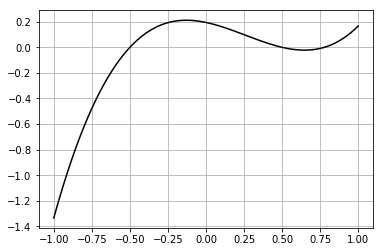

In [7]:
x = np.linspace(-1,1,10000)  #The range of numbers that we think the roots lie within (xmin, xmax, spacing)
f = x**3 - (7/9)*x**2 -(1/4)*x + 7/36  #Our function to be plotted

plt.figure(1)
hold = True

plt.plot(x,f,'k-')  # np.plot(x,function, a number of different parameters to make the plot look good)
plt.grid()          #Use the grid to make estimation



Purely by inspection, we were able to observe exactly where the roots of this function lie: $x = -\frac{1}{2},\frac{1}{2},\frac{3}{4}$. This was a nice and clean numerical solution to a problem that would've been much more difficult to solve analytically. Although this may seem convenient and albeit simple, this estimation approach is susceptible to some problems. Think of a potential problem that this estimation method is susceptible to and a solution to this problem. Click on the button below to reveal solutions. Dwelling upon the issues that arise using numerical techniques will provide you with insight into the approximate nature of these solutions and scientific computing in general. 


In [ ]:
#Display how changing parameters in the polynomial influence where the roots are found.
# Show how one could see this clearly from completing the square. 
#Given a polynomial function P(x,a), a being a parameter and x being a variable, find roots P(x,a)=0. 
#Illustrate the change of intervals under parameter a. Connect to 30-1, Specific outcome 12. 
#Focus especially on the roots of a quadratic polynomial. 
#Illustrate the roots based on the position of the parabola. 
#Indicate the position of parabola's tip (min/max) with respect to the roots. Curriculum: 30-1, outcome 11. 

#Note: The school curriculum calls for parameter a being integer. When using graphical illustration, it is OK to make it real. 


# Bisection Method
____

Here we will walk you through a root-finding algorithm called the "Bisection Method", which is good to find approximations of roots. For a quick review of this method and other root finding algorithms, go to https://en.wikipedia.org/wiki/Root-finding_algorithm#Bisection_method. 


